### Importing Libraries

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### About Data

Customers are asked to rate the store out of 10 i.e. **"satisfaction" point** given by the customers to the store. Using an algorithm, store gives **"Loyalty points"** to customers based on the no. of items purchased by them in the last year + the amount of money spent by them in the store. 

### Loading Data

In [361]:
data = pd.read_csv('C:\\Users\\dell\\Desktop\\market_data.csv')

### Data Exploration

In [362]:
data.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Satisfaction    30 non-null int64
Loyalty         30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


In [364]:
data.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


#### Let's plot

Text(0,0.5,'Loyalty')

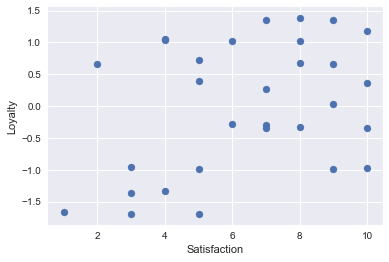

In [365]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Preparing input data

In [366]:
from sklearn import preprocessing
data_scaled = data.copy()
data_scaled = preprocessing.scale(data)
data_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

# <font color = "green">Elbow Method</font>

In [367]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 8):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(data_scaled)
  wcss.append(kmeans.inertia_)

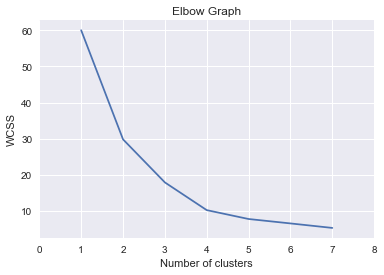

In [368]:
plt.plot(range(1, 8), wcss)
plt.xlim( 0, 8)  
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# <font color = "green">K-Means</font>

### Training Model

In [409]:
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(min_samples = 2)
dbscan_cluster.fit(data_scaled)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)

In [410]:
cluster_data= data.copy()
cluster_data['cluster_pred'] = dbscan_cluster.fit_predict(data_scaled)

### Clustering Labels

In [411]:
dbscan_cluster.labels_

array([ 0,  1, -1,  1,  2, -1,  3,  1,  4,  4, -1,  2, -1, -1, -1,  4,  4,
        4,  1,  4,  4,  0,  2,  0,  2,  3,  4, -1,  0,  2], dtype=int64)

In [415]:
n_clusters_ = len(np.unique(dbscan_cluster.labels_))
n_clusters_

6

In [416]:
 cluster_data

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,1
2,5,-0.99,-1
3,7,-0.29,1
4,4,1.06,2
5,1,-1.66,-1
6,10,-0.97,3
7,8,-0.32,1
8,8,1.02,4
9,8,0.68,4


### Visualisation

Text(0,0.5,'Loyalty')

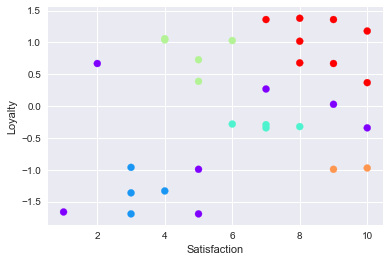

In [417]:
plt.scatter(data['Satisfaction'], data['Loyalty'], c = cluster_data['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

**Keep Following and Practice more :)**

**GeeksforGeeks**